In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import style
import pymysql

In [2]:
conn = pymysql.connect(host='localhost', port=int(3306), user='root', passwd='1a_2b_3c_4d$',db='causes_death')
conn

**This data is about causes of death cosidering previous years and entity death took place in. So, we shall analyze this data using sql and visualize using python.
First, let's start with deaths number per cause name and year**

In [3]:
cause_name = pd.read_sql_query("""with death_summary as (
  Select 
    `ï»¿Causes name` as `Cause Name`, 
    `Death Numbers`, 
    Entity, 
    Year 
  from 
    causes_death 
  where 
    Year IN (
      2010, 2011, 2012, 2013, 2014, 2015, 2016, 
      2017, 2018, 2019
    )
) 
select 
  `Cause Name`, 
  round(
    100 * sum(`Death Numbers`)/ (
      select 
        sum(`Death Numbers`) 
      from 
        death_summary
    ), 
    2
  ) as `% Death_Per_Cause` 
from 
  death_summary 
group by 
  `Cause Name` 
order by 
  2 desc
""",conn)
cause_name.head(10)

,Cause Name,% Death_Per_Cause
0,Cardiovascular diseases,35.65
1,Neoplasms,21.67
2,Chronic respiratory diseases,7.82
3,Digestive diseases,4.39
4,Lower respiratory infections,4.00
5,Alzheimer's disease and other dementias,3.07
6,Road injuries,2.82
7,Chronic kidney disease,2.77
8,Diabetes mellitus,2.69
9,Cirrhosis and other chronic liver diseases,2.48


*=> Cardiovascular diseases and Neoplasms represents over than 50% of causes of all deaths over the past 10 years*

In [4]:
#checking for null values

cause_name.isnull().sum()

Cause Name           0
% Death_Per_Cause    0
dtype: int64

*For this data we would neither check for outliers nor remove them, as how we treate outliers has a lot to do with the type of data and analysis performed*

Text(0.5, 1.0, 'Cause name vs % Death per cause')

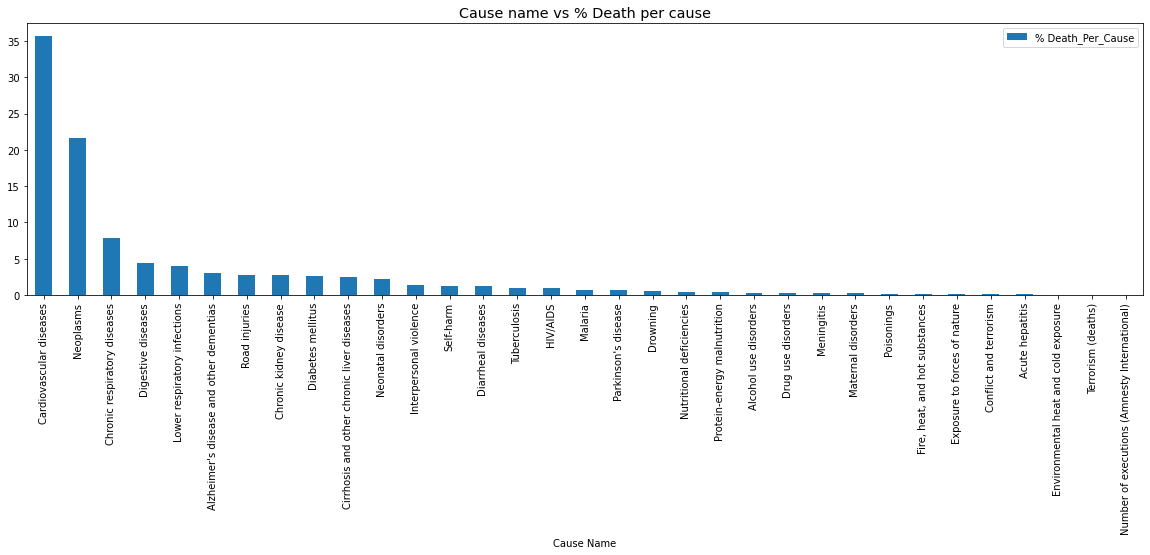

In [5]:
#visualizing cause name vs % Death per cause

cause_name[['Cause Name','% Death_Per_Cause']].set_index('Cause Name').plot(kind="bar", figsize=(20,5))
plt.style.use('ggplot')
plt.title('Cause name vs % Death per cause')

*Cardiovascular disease comes first, followed by Neoplasms and Chronic respiratory diseases comes third*

**Secondly, let's analyze deaths number per entity and year**

In [6]:
entity_name = pd.read_sql_query("""  with death_summary as (
    Select 
      `ï»¿Causes name` as `Cause Name`, 
      `Death Numbers`, 
      Entity, 
      Year 
    from 
      causes_death 
    where 
      Year IN (
        2010, 2011, 2012, 2013, 2014, 2015, 2016, 
        2017, 2018, 2019
      ))
      select Entity, round(100*sum(`Death Numbers`)/ (select sum(`Death Numbers`) from death_summary),2) as `% Death_Per_Cause`
      from death_summary
      group by Entity
      order by 2 desc
""",conn)
entity_name.head(10)

,Entity,% Death_Per_Cause
0,China,42.37
1,America,28.02
2,Brazil,5.44
3,Bangladesh,3.30
4,Democratic Republic of Congo,2.50
5,Egypt,2.47
6,Argentina,1.39
7,Canada,1.06
8,Colombia,0.93
9,Afghanistan,0.92


Text(0.5, 1.0, 'Entity name vs % Death ')

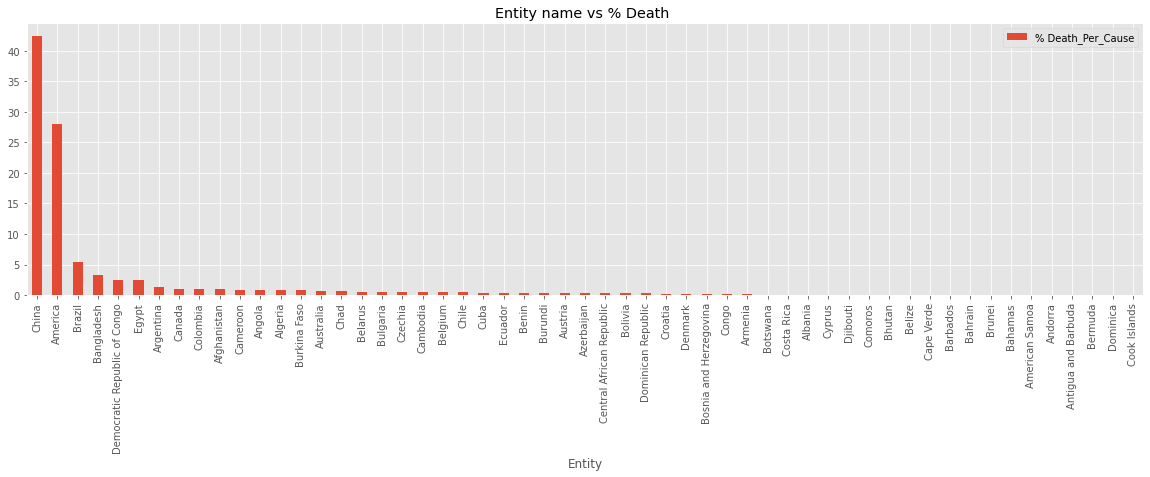

In [7]:
#visualizing entity name vs % Death per cause

entity_name[['Entity','% Death_Per_Cause']].set_index('Entity').plot(kind="bar", figsize=(20,5))
plt.style.use('ggplot')
plt.title('Entity name vs % Death ')

**According to the above chart it's clear that the top 3 entities rgarding % death are:**

      1- China
      2- America
      3- Brazil


In [8]:
#querying deaths yearly

yearly_deaths = pd.read_sql(""" SELECT 
    year, SUM(`Death Numbers`) AS `Total Deaths`
FROM
    causes_death
GROUP BY year
ORDER BY 1""",conn)
yearly_deaths.head()

,year,Total Deaths
0,1990,18652251.0
1,1991,18873439.0
2,1992,18857139.0
3,1993,19069323.0
4,1994,19170925.0


Text(0.5, 1.0, 'Yearly Deaths')

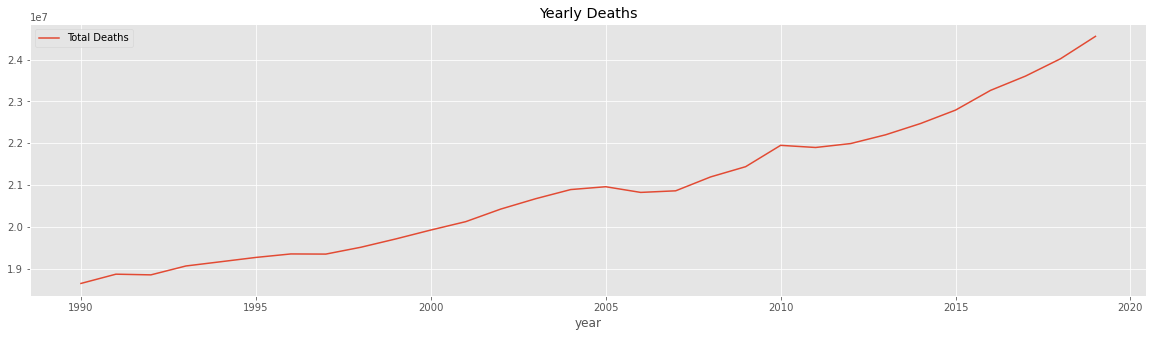

In [9]:
#visualizing deaths yearly

yearly_deaths[['year','Total Deaths']].set_index('year').plot(kind="line", figsize=(20,5))
plt.style.use('ggplot')
plt.title('Yearly Deaths')

*=> It's clear that the number of deaths over the world has been increasing tremendously over the past years, and 2020 has witnessed a spike in the increase in number of deaths*

# Data Findings

=> Cardiovascular diseases and Neoplasms represents over than 50% of causes of all deaths over the past 10 years

=> Cardiovascular disease comes first, followed by Neoplasms and Chronic respiratory diseases comes third

=> **The top 3 entities rgarding % death are:**

     1- China
     2- America
     3- Brazil
  
=> The number of deaths over the world has been increasing tremendously over the past years, and 2020 has witnessed a spike in the increase in number of deaths
